## Méthodes d'optimisation stochastique

## I. Minimisation stochastique d'une fonction déterministe


On s'intéresse au problème $f$ telle que $min f(x) =\max_{i=1\dots m}|a_i^Tx-b_i | = \max_{i=1\dots m} |(Ax-b)_i|.$ 

On suppose que $a_i$ est un vecteur colonne représentant la $i$eme ligne d'une matrice $A$ de taille $m \times n$ ($m=100, n=20$) , et les $b_i$ sont les composantes d'un second membre $b$ de taille $m$, ($1 \le i \le m$), $x$ un vecteur de taille $n$. Ces quantités sont générées une fois pour toutes à partir de distributions Gaussiennes de moyenne nulle et d'écart type identité.

**Question 1 :** Constuire $A$ et $b$. Proposer le calcul d'un sous-gradient en $x$ de $f$. On pourra utiliser la fonction findmax de Julia. 


<strong>Réponse</strong> : Le sous-différentiel de la fonction valeur absolue $|z|$ est défini pour tout $z$ comme :

$$\partial |z| = \begin{cases} [-1, 1] & \text{si } z = 0 \\ sign(z) & \text{sinon} \end{cases}$$

où $sign(z)$ est la fonction signe qui prend la valeur $-1$ si $z<0$, $0$ si $z=0$ et $1$ si $z>0$.

En utilisant la définition de $f$, on peut écrire :

$$f(x) = \max_{i=1,\dots,m} |a_i^Tx - b_i| = |a_k^Tx - b_k|$$

où $k$ est l'indice qui réalise le maximum de $|a_i^Tx - b_i|$.

On peut alors appliquer la règle de composition du sous-différentiel avec une fonction affine pour trouver le sous-différentiel de $f$. En effet, pour une fonction affine $h(x) = c^Tx + d$, le sous-différentiel est donné par :

$$\partial h(x) = {c}$$

où ${c}$ est l'ensemble qui contient $c$ si $c$ est un scalaire, et le vecteur colonne dont les composantes sont les éléments de $c$ si $c$ est un vecteur colonne.

Ainsi, le sous-gradient de $f$ en $x$ est donné par :

$$\partial f(x) = \begin{cases} a_k & \text{si } a_k^Tx - b_k > 0 \\ -a_k & \text{si } a_k^Tx - b_k < 0 \\ [-a_k, a_k] & \text{si } a_k^Tx - b_k = 0 \end{cases}$$

où $k$ est l'indice qui réalise le maximum de $|a_i^Tx - b_i|$. Notez que si plusieurs $k$ réalisent le maximum de $|a_i^Tx - b_i|$, le sous-gradient n'est pas unique et on peut choisir n'importe quel $k$ réalisant le maximum.

On peut aussi écrire comme:

$$ signe(f(x)) a_i \mbox{  avec  } i \mbox{  tel que  } f(x) = \mid (Ax-b)_i \mid $$

In [1]:
import Pkg
# Pkg.add("Distributions")
# Pkg.add("JuMP")
# Pkg.add("GLPK")
# Pkg.add("Plots")
# Pkg.add("PlotlyBase")
using PlotlyBase
using JuMP
using GLPK
using Plots
using Distributions
using LinearAlgebra

In [9]:
# Construction des données A  et b
# Insérer votre code
m, n = 100, 20
A = randn(m,n)
b = randn(m,1)
x = zeros(n,1)
# Fin insérer code

# Fonction calculant un sous-gradient en x de f
function subgrad(A,b,x) 
    # Insérer votre code
    f_x = A * x - b
    ind_max = findmax(abs.(f_x))[2][1]
    return sign(f_x[ind_max]) .* (A[ind_max,:])
    # Fin insérer code
end

subgrad (generic function with 1 method)

**Question 2 :** Ce problème peut se reformuler comme un problème de programmation linéaire : $$(\mathcal{P}_{lp})\quad \left\{ \begin{array}{c} \min_{(x,R)\in \mathbb{R}^n\times \mathbb{R}} h(x,R)=R\\
s.c. \quad-R*e\leq A*x-b\leq R*e\end{array}\right.$$ avec $e=[1,\cdots,1]^T\in \mathbb{R}^m$. Résoudre le problème $(\mathcal{P}_{lp})$ en utilisant le solveur "GLPK" de la librairie JuMP. Plus d'informations sont disponibles ici :  http://www.juliaopt.org/JuMP.jl/latest/quickstart/

In [11]:
#using Pkg
#Pkg.add("JuMP"); 
#Pkg.add("GLPK")
using JuMP
using GLPK

# Définition du modèle
# Insérer votre code
model = Model(GLPK.Optimizer)
# Fin insérer code

# Définition des variables d'optimisation
# Insérer votre code
@variable(model, x[1:n])
@variable(model, R >= 0)
# Fin insérer code

# Définition de la fonctionnelle à minimiser
#Insérer votre code
@objective(model, Min, R)
# Fin insérer code

# Définition des contraintes
# Insérer votre code
for i in 1:m
    @constraint(model, sum([A[i,j] * x[j] for j in 1:n]) - b[i] <= R)
    @constraint(model, sum([A[i,j] * x[j] for j in 1:n]) - b[i] >= -R)
end
# Fin insérer code
        
# Résolution        
# Insérer votre code
optimize!(model)
# Fin insérer code
        
# Résultats à optimalité                
# Insérer votre code
println(solution_summary(model))
xstar = value.(x)
fstar = value(R)

println("The function value at the solution is: ",fstar, " or ",findmax(abs.(A*xstar-b)))

* Solver : GLPK

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Message from the solver:
  "Solution is optimal"

* Candidate solution
  Objective value      : 1.65487e+00
  Objective bound      : -Inf
  Dual objective value : 1.65487e+00

* Work counters
  Solve time (sec)   : 5.56087e-03

The function value at the solution is: 1.654866049489444 or (1.6548660494894452, CartesianIndex(13, 1))


**Question 3 :** Résoudre le problème en utilisant un algorithme de sous-gradient. Dans un premier temps vous utiliserez un sous-gradient exact (Question 1), puis vous introduirez un bruit artificiel qui suit une distribution normale de moyenne nulle et d'écart-type $3 e-1$.

**Question 4 :** Vous afficherez les courbes de convergence de $f_{best}^k-f_{star}$, avec $f_{star}$ obtenue à la Question 1. Donnez la valeur minimale de $f_{best}^k-f_{star}$.

**Responses :** L'ajout de bruit dans la méthode de sous-gradient introduit une perturbation aléatoire qui altère les résultats obtenus en comparaison avec les sous-gradients exacts. Cette différence devient relativement stable après environ vingt itérations. Néanmoins, les deux courbes convergent vers zéro, indiquant que les deux méthodes permettent d'atteindre la convergence vers la solution optimale $f_{\star}$ du problème. Toutefois, la méthode utilisant le sous-gradient exact fournit une solution plus proche de la véritable solution optimale $f_{\star}$ par rapport à la méthode utilisant un sous-gradient bruité, étant donné que la perturbation aléatoire introduite par l'ajout de bruit peut altérer la direction du sous-gradient et ainsi éloigner la solution de la direction optimale.

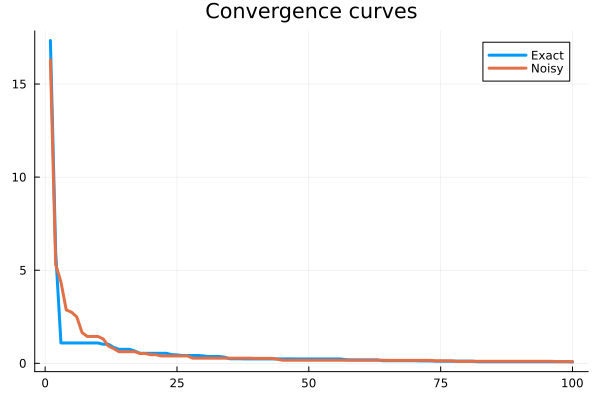

In [12]:
#Pkg.add("Plots")
using Plots
using LinearAlgebra

#Initialisation
x = zeros(n,1);
xp = x;
i = 0;
fbest =1e10; # $f_{best}^0$: cas du sous-gradient exact
fbestp=1e10; # $f_{best}^0$: cas du sous-gradient bruité
histo =[];# Suite des itérés f_{best}^k-f_{star} pour le cas du sous-gradient exact
histop=[];# Suite des itérés f_{best}^k-f_{star}, pour le cas du sous-gradient bruité

#Niveau de bruit
noise_lvl=.3;

# Rstar est le résultat obtenu par le solveur GLPK 
f_star = fstar;

# Resolution 
# Insérer votre code
while i < 1e2
    i += 1;
    
    # Pas du gradient
    alpha = 1/(i);
    
    # Sous-gradient exact et résultat
    g = subgrad(A, b, x);
    
    # Sous-gradient bruité
    gp = subgrad(A, b, xp) + noise_lvl*randn(n, 1);
    
    #Mise à jour des variables
    x = x - alpha*g;
    xp = xp - alpha*gp;
    
    # Mise à jour la valeur de f
    f = maximum(abs.(A*x - b));
    fbest = min(f,fbest);
    fp = maximum(abs.(A*xp - b))
    fbestp = min(fp,fbestp);
    
    append!(histo, fbest - f_star)
    append!(histop, fbestp - f_star) 
end

# Fin insérer code

#Affichage des courbes de convergence
iter=1:100;
hf=[histo,histop];
plot(iter,hf,title="Convergence curves",label=["Exact" "Noisy"],lw=3)

## II. Minimisation stochastique d'une fonction stochatique



On s'intéresse au problème
$$\min_x f(x) =\text{E} (\max_{i=1\dots m}|a_i^Tx-b_i |).$$

On suppose que $a_i$ est un vecteur colonne représentant la $i$eme ligne d'une matrice $A$ de taille $m \times n$ ($m=100, n=20$) , et les $b_i$ sont les composantes d'un second membre $b$ de taille $m$, ($1 \le i \le m$), $x$ un vecteur de taille $n$. Ces quantités sont générées une fois pour toutes à partir de distributions Gaussiennes de moyenne connue $\bar{A}$ et $\bar{b}$ (non nécesairement nulle) et d'écart type identité.

**Question 5 :** Proposer deux fonctions d'évaluation de la fonction $f$ et d'un sous-gradient de $f$ basées sur des échantillons de taille $M$.


In [13]:
# Evaluation de f
function fvals(Abar,bbar,noise,xs,M) 
    # Abar, bbar : moyenne des données
    # noise : niveau de bruit 
    # xs : vecteur courant 
    # M: taille de l'échantillon

    # Insérer votre code
    
    somme = 0;
    
    for k in 1:M 
        # Échantillonnage des données 
        A = randn(m,n)*noise + Abar
        b = randn(m)*noise + bbar
        somme += maximum(abs.(A*xs - b));
    end
    
    return somme/M

    # Fin insérer code
    

end

# Evaluation d'un sous-gradient
function subgrads(Abar,bbar,noise,xs,M)
    # Abar, bbar : moyenne des données
    # noise : niveau de bruit 
    # xs : vecteur courant 
    # M: taille de l'échantillon
    
    # Insérer votre code
    
    somme = zeros(n,1)
    
    for i=1:M
        # Échantillonnage des données 
        A = randn(m,n)*noise + Abar
        b = randn(m)*noise + bbar
        somme += subgrad(A, b, xs);
    end
    
    return somme/M
    
    # Fin insérer code

end


subgrads (generic function with 1 method)

**Question 6 :** Comparer les courbes de convergence du problème déterministe $$ \min_x f(x) = \max_{i=1\dots m}|\text{E} (a_i)^Tx-\text{E} (b_i) |,$$ et du problème stochastique obtenu avec $M=10,100,1000$ échantillons. Donnez la valeur minimale de $f$.


Echantillion M = 10
	La valeur optimale de f (gradient déterministe): 54.30673247975462
	La valeur optimale de f (gradient stochastique): 34.504471136745615
Echantillion M = 100
	La valeur optimale de f (gradient déterministe): 69.22878253913701
	La valeur optimale de f (gradient stochastique): 35.496176535087336
Echantillion M = 1000
	La valeur optimale de f (gradient déterministe): 57.90296154341347
	La valeur optimale de f (gradient stochastique): 34.12997274241885

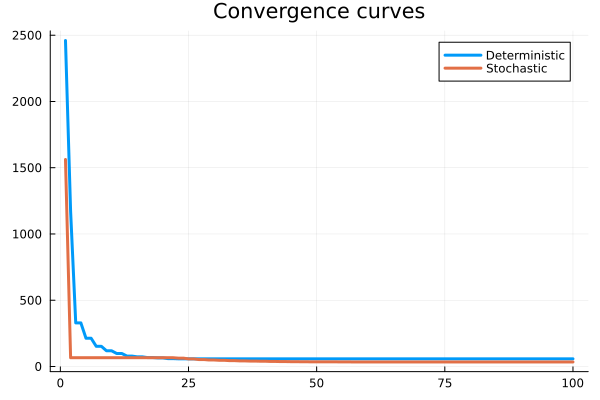

In [14]:
for M = [10, 100, 1000]
    print("\nEchantillion M = ", M)
    print("\n")
    # Données
    Abar=10*ones(m,n)+1*randn(m,n);
    bbar=10*randn(m,1);

    #x_0
    xd = zeros(n,1); # problème déterministe
    xs = xd; # problème stochastique

    # Bruit et echantillon
    #M  = 200;
    noise  = 4;

    j = 0;

    fbestd =1e10; # $f_{best}^0$: cas d'une résolution déterministe
    fbests =1e10; # $f_{best}^0$: cas d'une résolution stochastique
    histod =[]; # Suite des itérés f_{best}^k pour le cas d'une résolution déterministe
    histos =[]; # Suite des itérés f_{best}^k pour le cas d'une résolution stochastique

    max_iter = 1e2

    # Insérer votre code
    while j < max_iter
        j += 1;

        # Pas du gradient
        alpha = 1/(j);

        # Sous-gradient exact et résultat
        gd = subgrad(Abar, bbar, xd);

        # Sous-gradient stochastique
        gs = subgrads(Abar, bbar, noise, xs, M);

        #Mise à jour des variables
        xd = xd - alpha*gd;
        xs = xs - alpha*gs;

        # Mise à jour la valeur de f
        fd = fvals(Abar,bbar,noise,xd,M);
        fbestd = min(fd,fbestd);
        fs = fvals(Abar,bbar,noise,xs,M);
        fbests = min(fs,fbests);

        append!(histod, fbestd
        append!(histos, fbests) 
    end
    # Fin insérer code
    #Affichage
    print("\tLa valeur optimale de f (gradient déterministe): ", histod[end])
    print("\n\tLa valeur optimale de f (gradient stochastique): ", histos[end])
    iter=1:max_iter;
    hf=[histod,histos];
end

plot(iter,hf,title="Convergence curves",label=["Deterministic" "Stochastic"],lw=3)

**Obs:** La courbe obtenue en utilisant la méthode stochastique présente une fluidité améliorée à mesure que la valeur de M augmente. En effet, la méthode stochastique est conçue pour traiter les données bruyantes en incorporant des éléments probabilistes qui lui permettent d’atténuer les fluctuations qui découlent de perturbations aléatoires.

En revanche, la méthode déterministe suppose que les données sont exemptes de bruit et génère donc une courbe qui peut ne pas saisir avec précision la tendance sous-jacente lorsque le bruit est présent. On peut le constater dans l’écart croissant observé sur les itérations à mesure que les données deviennent de plus en plus bruyantes, conduisant à des résultats différents de ceux obtenus en utilisant la méthode stochastique.

Il convient de noter que l’effet du bruit sur la méthode déterministe devient plus prononcé à mesure que la valeur de M augmente, car les valeurs de M plus grandes sont plus sensibles aux fluctuations en raison du plus grand nombre de points de données concernés. En conséquence, la méthode stochastique est généralement préférée lorsque l’on travaille avec des données bruyantes, car elle est mieux en mesure de gérer ces fluctuations et de produire des résultats plus précis.

**Question 7 :** Répéter les expériences et comparer les valeurs meilleurs valeurs de f obtenues ($f_{best}$) aprs un nombre fixé d'itérations. Donnez la valeur minimale de $f_{best}$

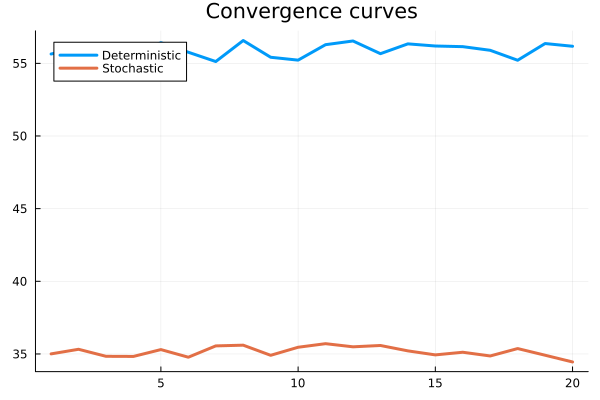

In [15]:
# Données
Abar=10*ones(m,n)+1*randn(m,n);
bbar=10*randn(m,1);

# x_0
xd = zeros(n,1); # résolution déterministe
xs = xd;  # résolution stochastique

# Bruit et echantillon
M  = 200;
noise  = 4;

#Nombre d'itérations
niter=100;

j = 0;

fbestd =1e10; # $f_{best}^0$: cas d'une résolution déterministe
fbests =1e10; # $f_{best}^0$: cas d'une résolution stochastique
fbesttd=[]; # f_{best} pour chaque expériences dans le cas d'une résolution déterministe
fbestts=[]; # f_{best} pour chaque expériences dans le cas d'une résolution stochastique

for nexp=1:20
    
    # Répétition des expériences    
    # Insérer votre code
    fbestd =1e10; # $f_{best}^0$: cas d'une résolution déterministe
    fbests =1e10; # $f_{best}^0$: cas d'une résolution stochastique
    xd_aux = xd
    xs_aux = xs
    fbestd_aux = fbestd;
    fbests_aux = fbests;
    j = 0;
    while j < niter
        j += 1;

        # Pas du gradient
        alpha = 1/(j);

        # Sous-gradient exact et résultat
        gd = subgrad(Abar, bbar, xd_aux);

        # Sous-gradient stochastique
        gs = subgrads(Abar, bbar, noise, xs_aux, M);

        #Mise à jour des variables
        xd_aux = xd_aux - alpha*gd;
        xs_aux = xs_aux - alpha*gs;
        
        fd = fvals(Abar,bbar,noise,xd_aux,M);
        fbestd_aux = min(fd,fbestd_aux);
        fs = fvals(Abar,bbar,noise,xs_aux,M);
        fbests_aux = min(fs,fbests_aux);
    end
    append!(fbesttd, fbestd_aux)
    append!(fbestts, fbests_aux)
    # Fin insérer code
end

#Affichage

iter=1:20;
hf=[fbesttd,fbestts];
plot(iter,hf,title="Convergence curves",label=["Deterministic" "Stochastic"],lw=3)

**Obs:** La méthode stochastique donne des résultats divers pour de multiples expériences menées à l’aide de paramètres identiques, certains résultats se rapprochant davantage de la solution obtenue par la méthode déterministe que d’autres. En moyenne, la méthode stochastique produit des résultats supérieurs à ceux produits par la méthode déterministe.

Cette variance dans les résultats de la méthode stochastique découle de la nature probabiliste de l’approche, qui implique l’introduction de la randomité dans l’algorithme. 